# Early stage diabetes risk prediction

## Configurações do notebook

Importação dos pacotes utilizados

In [1]:
import pandas as pd

In [2]:
import plotly.graph_objects as go

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [7]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [9]:
from sklearn import svm

In [10]:
from sklearn.svm import LinearSVC

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.svm import SVC

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

Declarando o caminho do arquivo com o conjunto de dados

In [15]:
caminho_arquivo = 'diabetes_data_upload.csv'

Leitura arquivo do conjunto de dados

In [16]:
diabetes = pd.read_csv(caminho_arquivo)

## 1. Faça a análise exploratória dos dados, apresente em forma de gráficos e estatísticas dos dados

### Analisando o conteúdo do conjunto de dados

**Nome do conjunto de dados:** Early stage diabetes risk prediction dataset

**Descrição do conjunto de dados:** este conjunto de dados contém dados de diagnósticos e sintomas de recém diabéticos ou de pacientes que podem ser diabéticos. Os dados foram coletados usando questionários diretos de pacientes do Hospital de Diabetes de Sylhet em Bangladesh e foram aprovados por um médico.

**Fonte:**
1. M M Faniqul Islam (Queen Mary University of London, United Kingdom),
2. Rahatara Ferdousi (Metropolitan University Sylhet, Bangladesh),
3. Sadikur Rahman, and Humayra (Metropolitan University Sylhet, Bangladesh)
4. Yasmin Bushra (Metropolitan University Sylhet, Bangladesh)

Mostrando as informações do conjunto de dados

In [17]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

O conjunto de dados possui 520 linhas e 17 colunas em que cada linha contém a observação do diagnósticos e dos sintomas apresentados de cada paciente, nas primeiras 16 colunas, e a última coluna sendo a classificação do paciente como sendo diabético (Positive) ou não (Negative). Seguem abaixo o significado de cada uma das colunas.

0. **Age:** idade
1. **Gender:** Gênero
2. **Polyuria:** Poliúria (aumento da produção de urina)
3. **Polydipsia:** Polidipsia (sede anormal ou excessiva)
4. **sudden weight loss:** perda de peso repentina
5. **weakness:** fraqueza
6. **Polyphagia:** Polifagia (fome excessiva e ingestão anormalmente alta de sólidos pela boca)
7. **Genital thrush:** Candidíase (infecção genital por fungos) 
8. **visual blurring:** visão embaçada
9. **Itching:** coceira
10. **Irritability:** irritabilidade
11. **delayed healing:** cicatrização demorada
12. **partial paresis:** paralisia parcial de algum membro
13. **muscle stiffness:** rigidez muscular
14. **Alopecia:** perda de pelos do corpo
15. **Obesity:** obesidade
16. **class:** classe (diabético ou não)

Mostrando os cinco primeiros registros do conjunto de dados

In [18]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Desta forma podemos observar que provavelmente a coluna de idade possui valores inteiros, a coluna de gênero "Male" ou "Female", as colunas 2 a 15 possuem valores "Yes" ou "No" e a última coluna da classe possui valores "Positive" e "Negative". Para verificar isso, vamos descrever os valores da coluna de idade e contar os valores das outras colunas.

In [19]:
diabetes['Age'].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

Observando a descrição dos dados da coluna de idade, podemos verificar que as idades estão dentro de um intervalo esperado, sendo a menor idade (min) igual a 16 anos e a maior delas (max) igual a 90 anos. 

In [20]:
for _, coluna in diabetes.iloc[:,2:16].iteritems():
    print(coluna.value_counts())

No     262
Yes    258
Name: Polyuria, dtype: int64
No     287
Yes    233
Name: Polydipsia, dtype: int64
No     303
Yes    217
Name: sudden weight loss, dtype: int64
Yes    305
No     215
Name: weakness, dtype: int64
No     283
Yes    237
Name: Polyphagia, dtype: int64
No     404
Yes    116
Name: Genital thrush, dtype: int64
No     287
Yes    233
Name: visual blurring, dtype: int64
No     267
Yes    253
Name: Itching, dtype: int64
No     394
Yes    126
Name: Irritability, dtype: int64
No     281
Yes    239
Name: delayed healing, dtype: int64
No     296
Yes    224
Name: partial paresis, dtype: int64
No     325
Yes    195
Name: muscle stiffness, dtype: int64
No     341
Yes    179
Name: Alopecia, dtype: int64
No     432
Yes     88
Name: Obesity, dtype: int64


Com relação às colunas 2 a 15 realmente os valores encontrados são Yes (sim) ou No (não).

In [21]:
diabetes['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

E que com relação à coluna de classe os valores realmente são apenas Positive (positivo) ou Negative (negativo)

Agora vamos confirmar se alguma das colunas do conjunto de dados possui algum valor faltante.

In [22]:
diabetes.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

E podemos verificar que todas as colunas estão completas, assim como já podíamos observar quando verificamos as informações do conjunto de dados e todas as colunas possuíam 520 objetos não-nulos.

### Analisando a distribuição das características do conjunto de dados

Vamos analisar as distribuições da variável target "class" e de cada uma das características dos pacientes em relação a ela selecionando os dados e plotando os gráficos. Para facilitar na hora de plotar os gráficos, vamos declarar uma função que vai plotar os gráficos com duas categorias abaixo.

In [23]:
def encontrar_valores(dataset: pd.DataFrame, nome_categoria_1: str, valor_categoria_1: str, nome_categoria_2: str) -> list:
    valores = dataset.loc[dataset[nome_categoria_1] == valor_categoria_1, nome_categoria_2].value_counts().sort_index(ascending=False)
    return valores

In [24]:
def encontrar_perc(dataset: pd.DataFrame, nome_categoria_1: str, valor_categoria_1: str, nome_categoria_2: str) -> list:
    """Função para encontrar o percentual de valor dentro da categoria"""
    perc = dataset.loc[dataset[nome_categoria_1] == valor_categoria_1, nome_categoria_2].value_counts(normalize=True) * 100
    return perc.round(decimals=2).sort_index(ascending=False)

In [25]:
def construir_texto(valores: list, valores_perc: list) -> str:
    """Função para construir o texto que aparece nas barras do gráfico contendo o valor e o percentual"""
    texto = ''
    if len(valores) == len(valores_perc):
        texto = [f"{valor} ({perc}%)" for valor, perc in zip(valores, valores_perc)]
    return texto

In [26]:
def plotar_grafico_uma_categoria(coluna: pd.Series, titulo_grafico: str, legenda_eixo_x: str, legenda_eixo_y: str) -> None:
    valores = coluna.value_counts().sort_index(ascending=False)
    valores_perc = (coluna.value_counts(normalize=True) * 100).round(decimals=2).sort_index(ascending=False)
    texto = construir_texto(valores, valores_perc)
    data = [go.Bar(
                x=valores.index,
                y=valores,
                text=texto,
                textposition = 'auto',
                textfont=dict(
                    size=18,
                ),
                hoverinfo='none',
                marker_color=['blue', 'red']
        )]
    layout = go.Layout(
        title=go.layout.Title(
            text=titulo_grafico,
            xref='paper',
            x=0,
        ),
        xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text=legenda_eixo_x,
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text=legenda_eixo_y,
            )
        ),
    )
    fig = go.Figure(data=data, layout=layout)
    fig.show('svg')

In [27]:
def plotar_grafico_duas_categorias(outra_categoria: str, titulo_grafico: str, legenda_eixo_x: str, legenda_eixo_y: str) -> None:
    """Função responsável por plotar um gráfico com duas categorias sendo que uma delas é a própria variável target, que assume apenas os valores Positivo ou Negativo, e a outra é a categoria passada como argumento"""
    valores_positivo = encontrar_valores(diabetes, 'class', 'Positive', outra_categoria)
    valores_positivo_perc = encontrar_perc(diabetes, 'class', 'Positive', outra_categoria)
    texto_positivo = construir_texto(valores_positivo, valores_positivo_perc)
    valores_negativo = encontrar_valores(diabetes, 'class', 'Negative', outra_categoria)
    valores_negativo_perc = encontrar_perc(diabetes, 'class', 'Negative', outra_categoria)
    texto_negativo = construir_texto(valores_negativo, valores_negativo_perc)
    trace2 = go.Bar(
        x=valores_negativo.index,
        y=valores_negativo,
        name='Negativo',
        text=texto_negativo,
        textposition = 'auto',
        textfont=dict(
            size=14,
        ),
        hoverinfo='none',
        marker_color='red'
    )
    trace1 = go.Bar(
        x=valores_positivo.index,
        y=valores_positivo,
        name='Positivo',
        text=texto_positivo,
        textposition = 'auto',
        textfont=dict(
            size=14,
        ),
        hoverinfo='none',
        marker_color='blue'
    )

    data = [trace1, trace2]
    layout = go.Layout(
        barmode='group',
        title=go.layout.Title(
            text=titulo_grafico,
            xref='paper',
            x=0,
        ),
        xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text=legenda_eixo_x,
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text=legenda_eixo_y,
            )
        ),
        legend=dict(
            x=0.9,
            y=1.15,
        ),
    )
    fig = go.Figure(data=data, layout=layout)
    fig.show('svg')

#### Distribuição da variável class

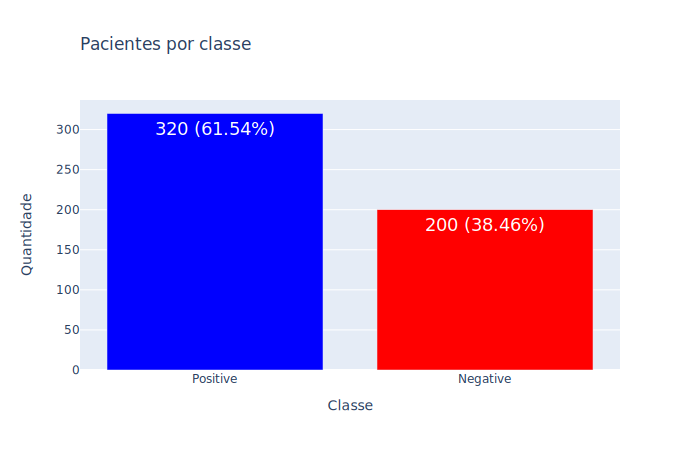

In [28]:
plotar_grafico_uma_categoria(
    diabetes['class'],
    'Pacientes por classe',
    'Classe',
    'Quantidade'
)

#### Distribuição da variável Age

In [29]:
diabetes['Age'].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

In [30]:
positivo_por_idade = diabetes.loc[diabetes['class'] == 'Positive', 'Age']
positivo_por_idade.describe()

count    320.000000
mean      49.071875
std       12.097481
min       16.000000
25%       39.000000
50%       48.000000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

In [31]:
negativo_por_idade = diabetes.loc[diabetes['class'] == 'Negative', 'Age']
negativo_por_idade.describe()

count    200.000000
mean      46.360000
std       12.080983
min       26.000000
25%       37.000000
50%       45.000000
75%       55.000000
max       72.000000
Name: Age, dtype: float64

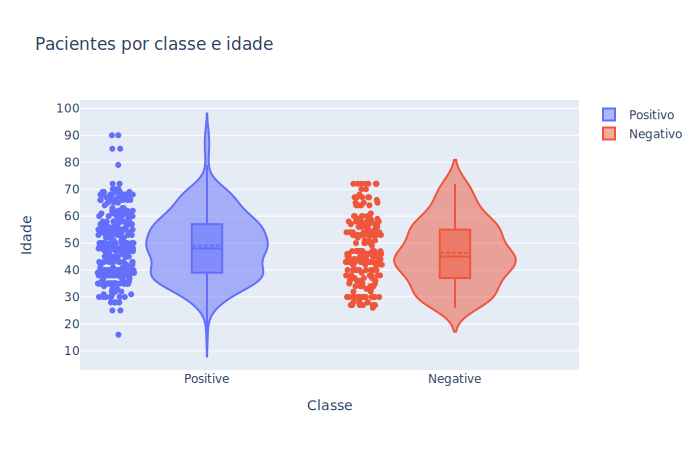

In [32]:
fig = go.Figure()

fig.add_trace(go.Violin(x=diabetes['class'][diabetes['class'] == 'Positive'],
                        y=positivo_por_idade,
                        name='Positivo',
                        points='all',
                        box_visible=True,
                        meanline_visible=True)
)

fig.add_trace(go.Violin(x=diabetes['class'][diabetes['class'] == 'Negative'],
                        y=negativo_por_idade,
                        name='Negativo',
                        points='all',
                        box_visible=True,
                        meanline_visible=True)
)

fig.update_layout(
    title_text='Pacientes por classe e idade',
    xaxis_title_text='Classe',
    yaxis_title_text='Idade',
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 10
    )
)

fig.show('svg')

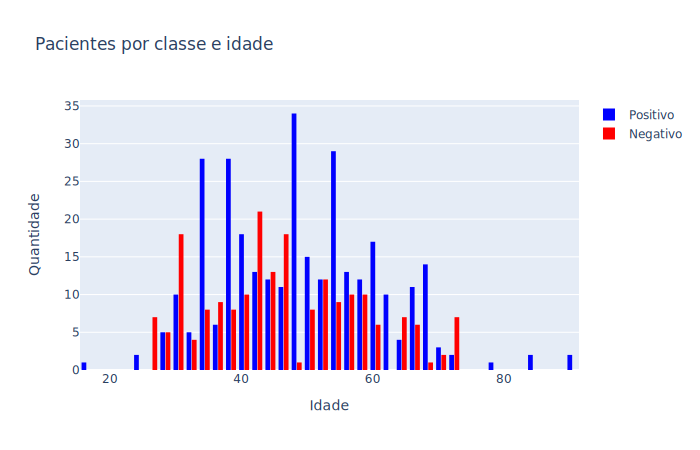

In [33]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=positivo_por_idade,
    name='Positivo',
    marker_color='blue',
))
fig.add_trace(go.Histogram(
    x=negativo_por_idade,
    name='Negativo',
    marker_color='red',
))

fig.update_layout(
    title_text='Pacientes por classe e idade',
    xaxis_title_text='Idade',
    yaxis_title_text='Quantidade',
    bargap=0.2,
    bargroupgap=0.1
)

fig.show('svg')

#### Distribuição da variável Gender

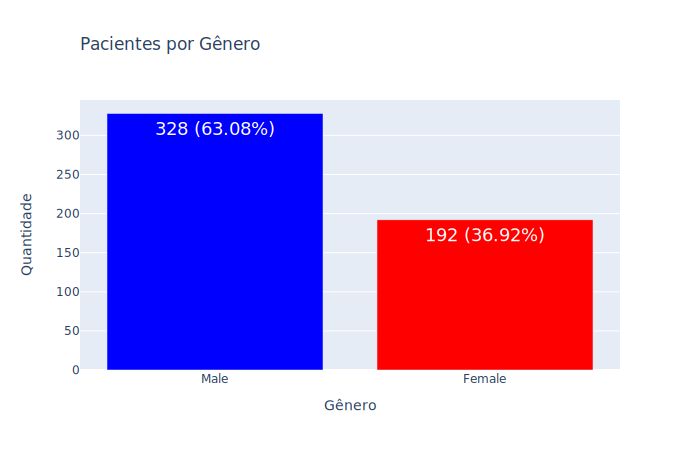

In [34]:
plotar_grafico_uma_categoria(
    diabetes['Gender'],
    'Pacientes por Gênero',
    'Gênero',
    'Quantidade'
)

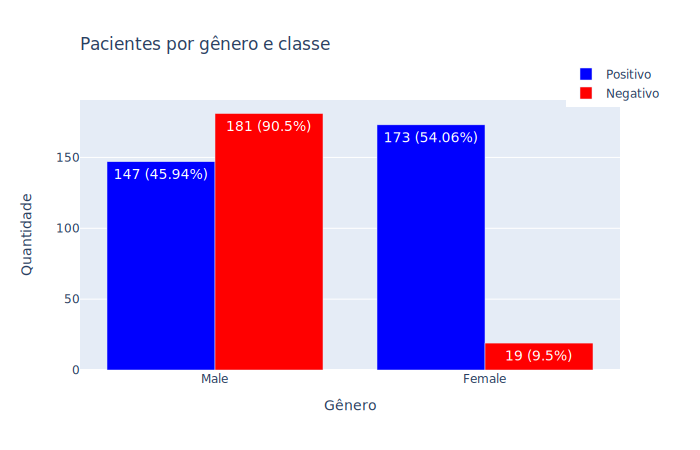

In [35]:
plotar_grafico_duas_categorias(
    'Gender',
    'Pacientes por gênero e classe',
    'Gênero',
    'Quantidade'
)

#### Distribuição da variável Polyuria

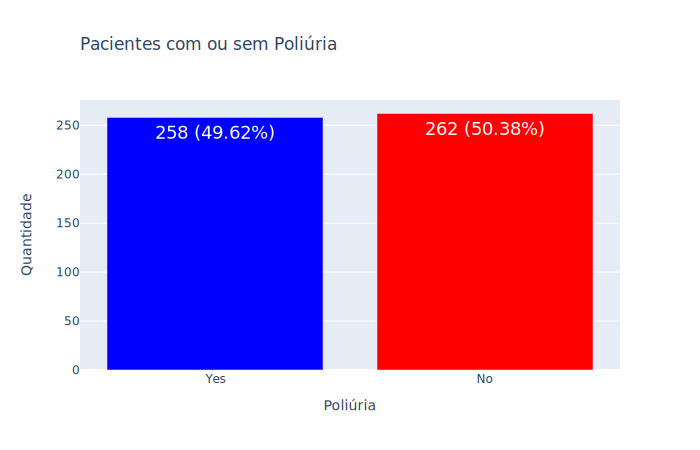

In [36]:
plotar_grafico_uma_categoria(
    diabetes['Polyuria'],
    'Pacientes com ou sem Poliúria',
    'Poliúria',
    'Quantidade'
)

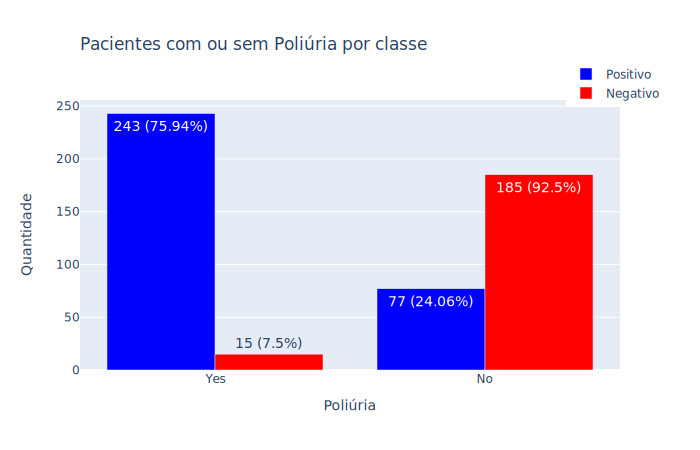

In [37]:
plotar_grafico_duas_categorias(
    'Polyuria',
    'Pacientes com ou sem Poliúria por classe',
    'Poliúria',
    'Quantidade'
)

#### Distribuição da variável Polydipsia

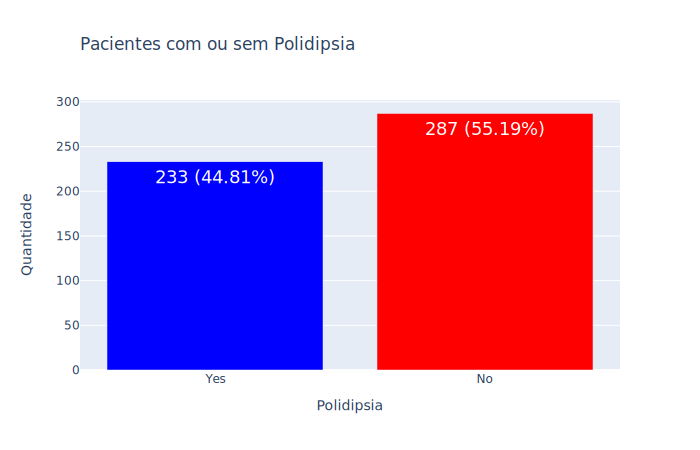

In [38]:
plotar_grafico_uma_categoria(
    diabetes['Polydipsia'],
    'Pacientes com ou sem Polidipsia',
    'Polidipsia',
    'Quantidade'
)

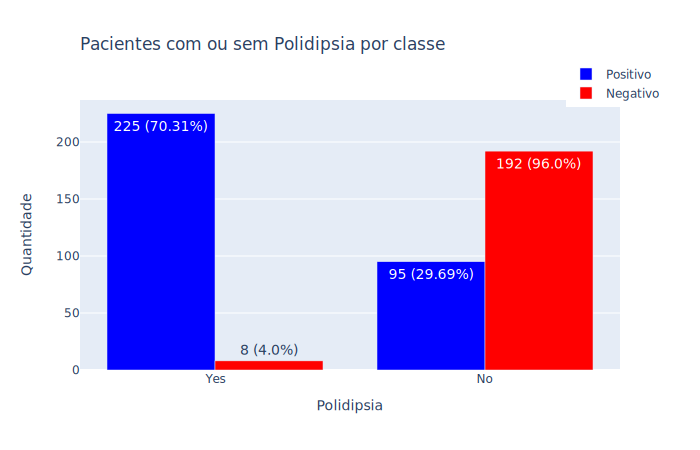

In [39]:
plotar_grafico_duas_categorias(
    'Polydipsia',
    'Pacientes com ou sem Polidipsia por classe',
    'Polidipsia',
    'Quantidade'
)

#### Distribuição da variável sudden weight loss

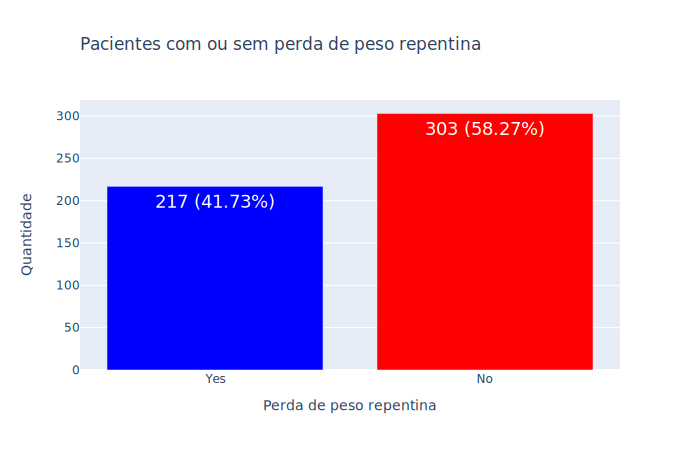

In [40]:
plotar_grafico_uma_categoria(
    diabetes['sudden weight loss'],
    'Pacientes com ou sem perda de peso repentina',
    'Perda de peso repentina',
    'Quantidade'
)

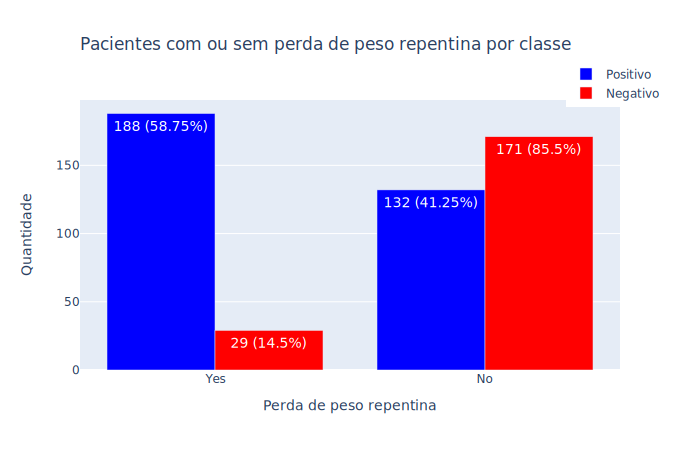

In [41]:
plotar_grafico_duas_categorias(
    'sudden weight loss',
    'Pacientes com ou sem perda de peso repentina por classe',
    'Perda de peso repentina',
    'Quantidade'
)

#### Distribuição da variável weakness

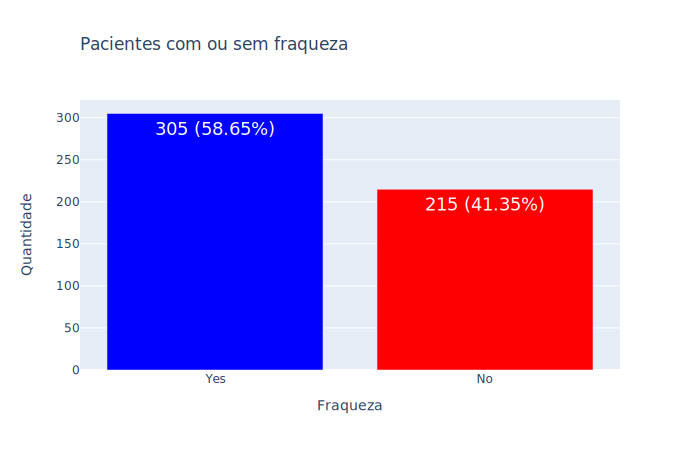

In [42]:
plotar_grafico_uma_categoria(
    diabetes['weakness'],
    'Pacientes com ou sem fraqueza',
    'Fraqueza',
    'Quantidade'
)

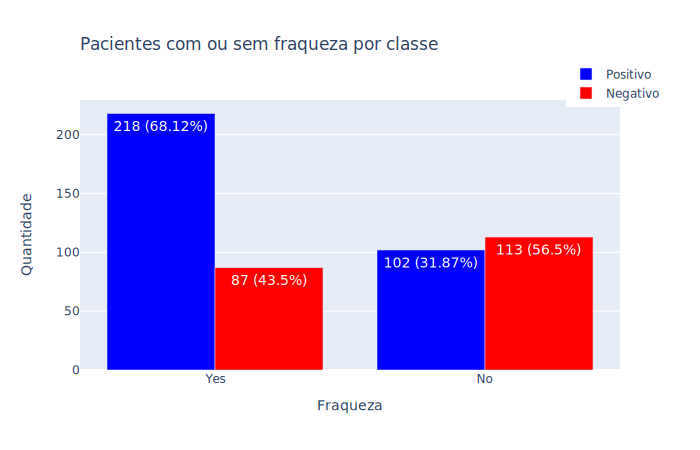

In [43]:
plotar_grafico_duas_categorias(
    'weakness',
    'Pacientes com ou sem fraqueza por classe',
    'Fraqueza',
    'Quantidade'
)

#### Distribuição da variável Polyphagia

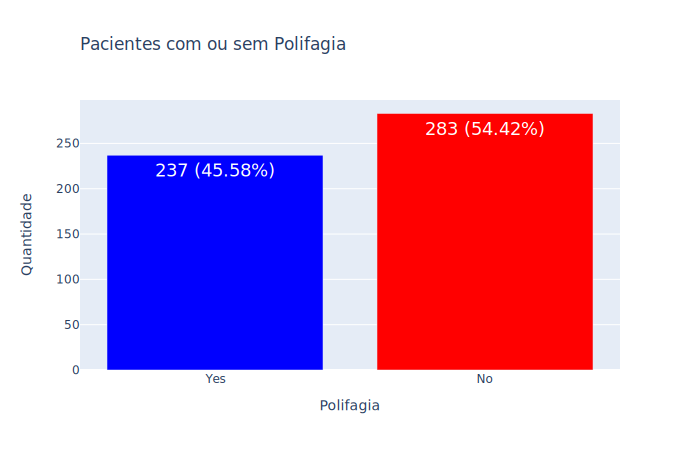

In [44]:
plotar_grafico_uma_categoria(
    diabetes['Polyphagia'],
   'Pacientes com ou sem Polifagia',
    'Polifagia',
    'Quantidade'
)

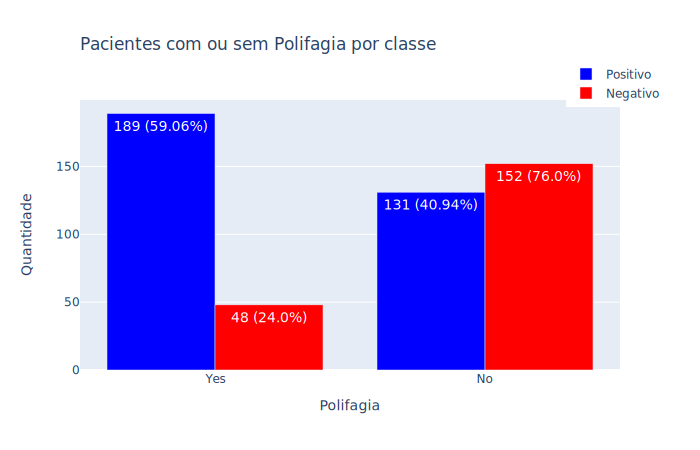

In [45]:
plotar_grafico_duas_categorias(
    'Polyphagia',
    'Pacientes com ou sem Polifagia por classe',
    'Polifagia',
    'Quantidade'
)

#### Distribuição da variável Genital thrush

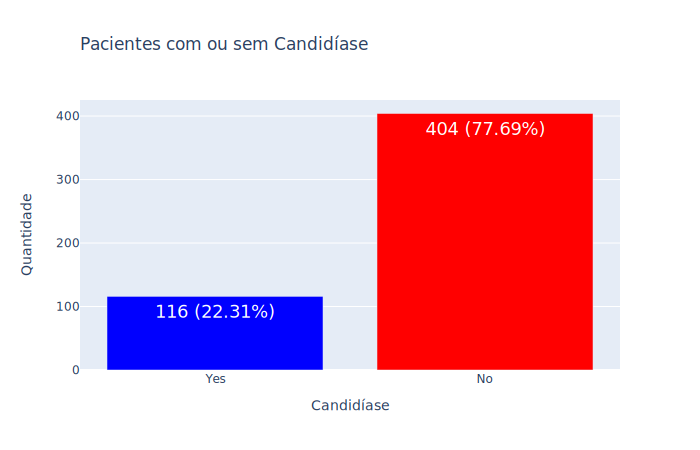

In [46]:
plotar_grafico_uma_categoria(
    diabetes['Genital thrush'],
    'Pacientes com ou sem Candidíase',
    'Candidíase',
    'Quantidade'
)

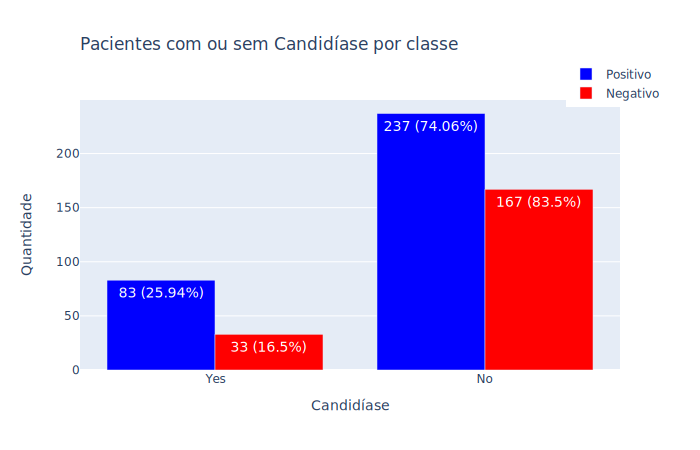

In [47]:
plotar_grafico_duas_categorias(
    'Genital thrush',
    'Pacientes com ou sem Candidíase por classe',
    'Candidíase',
    'Quantidade'
)

#### Distribuição da variável visual blurring

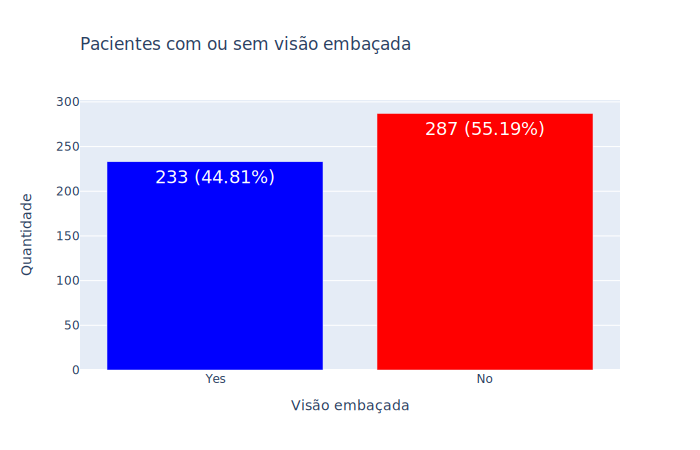

In [48]:
plotar_grafico_uma_categoria(
    diabetes['visual blurring'],
    'Pacientes com ou sem visão embaçada',
    'Visão embaçada',
    'Quantidade'
)

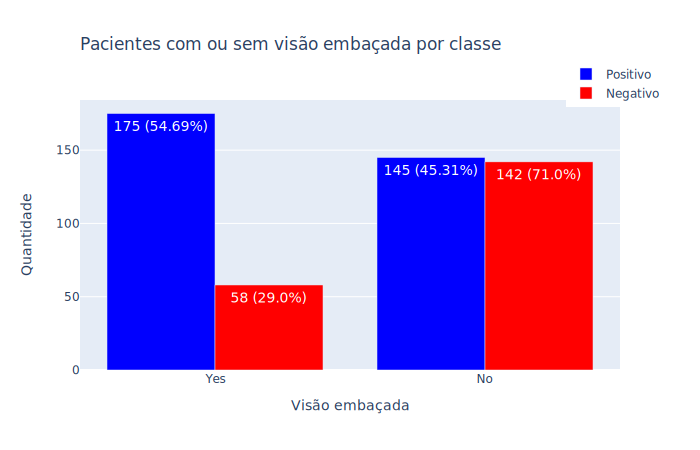

In [49]:
plotar_grafico_duas_categorias(
    'visual blurring',
    'Pacientes com ou sem visão embaçada por classe',
    'Visão embaçada',
    'Quantidade'
)

#### Distribuição da variável Itching

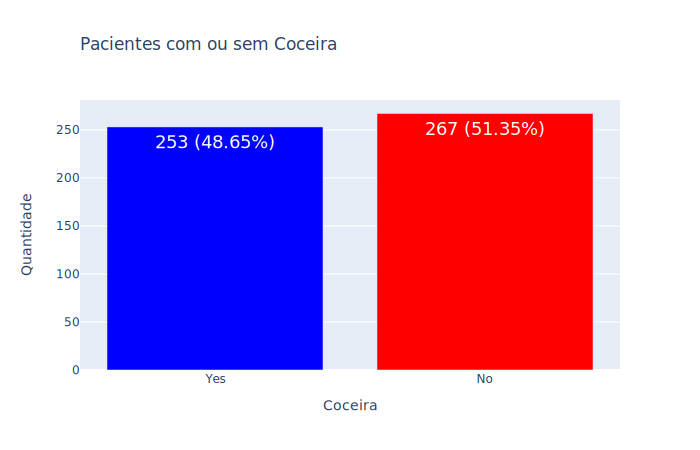

In [50]:
plotar_grafico_uma_categoria(
    diabetes['Itching'],
    'Pacientes com ou sem Coceira',
    'Coceira',
    'Quantidade'
)

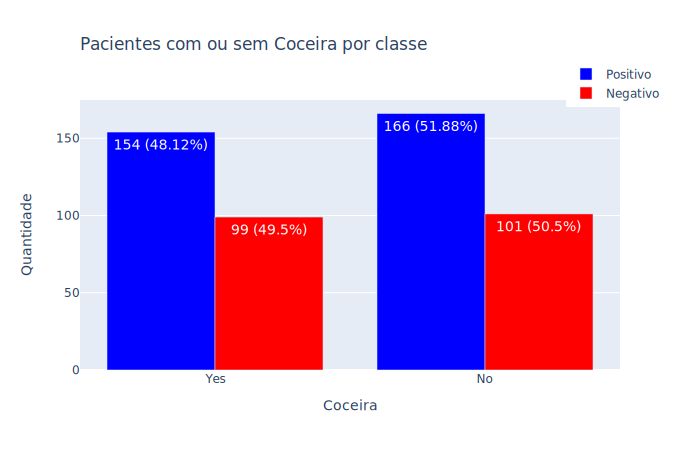

In [51]:
plotar_grafico_duas_categorias(
    'Itching',
    'Pacientes com ou sem Coceira por classe',
    'Coceira',
    'Quantidade'
)

#### Distribuição da variável Irritability

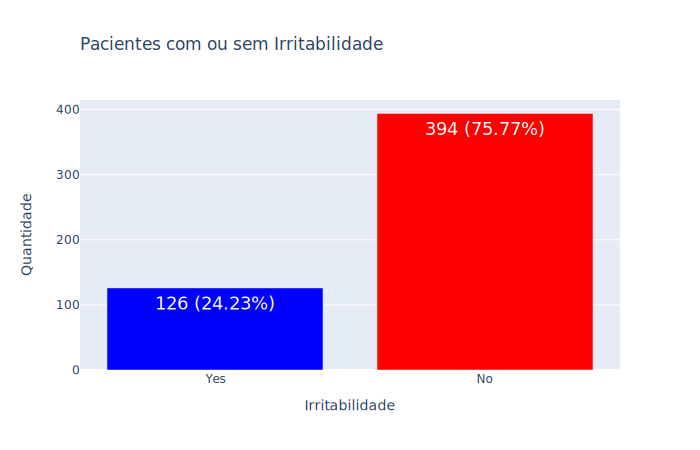

In [52]:
plotar_grafico_uma_categoria(
    diabetes['Irritability'],
    'Pacientes com ou sem Irritabilidade',
    'Irritabilidade',
    'Quantidade'
)

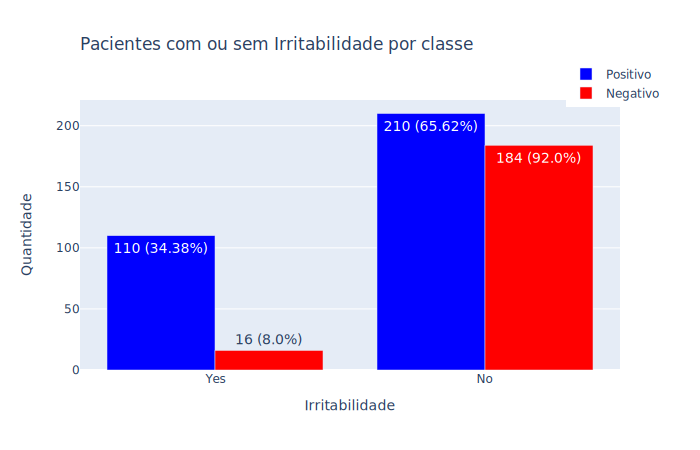

In [53]:
plotar_grafico_duas_categorias(
    'Irritability',
    'Pacientes com ou sem Irritabilidade por classe',
    'Irritabilidade',
    'Quantidade'
)

#### Distribuição da variável delayed healing

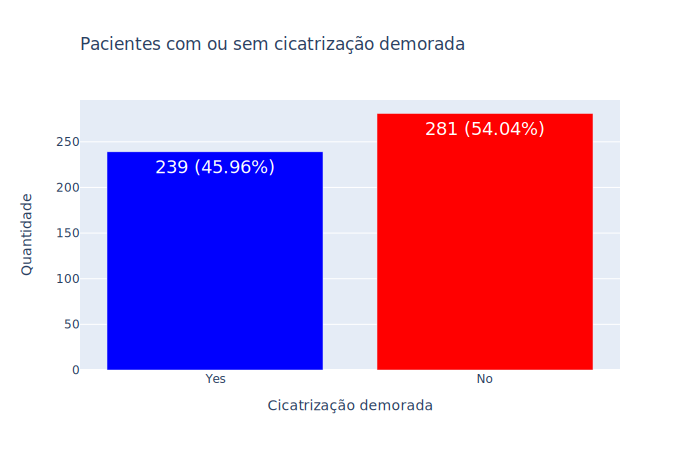

In [54]:
plotar_grafico_uma_categoria(
    diabetes['delayed healing'],
    'Pacientes com ou sem cicatrização demorada',
    'Cicatrização demorada',
    'Quantidade'
)

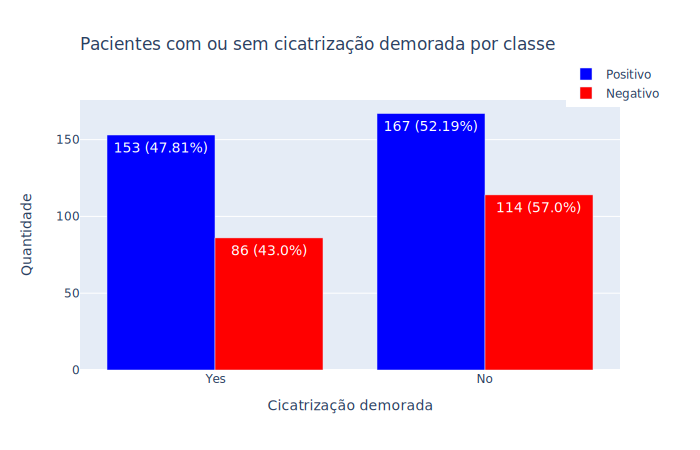

In [55]:
plotar_grafico_duas_categorias(
    'delayed healing',
    'Pacientes com ou sem cicatrização demorada por classe',
    'Cicatrização demorada',
    'Quantidade'
)

#### Distribuição da variável partial paresis

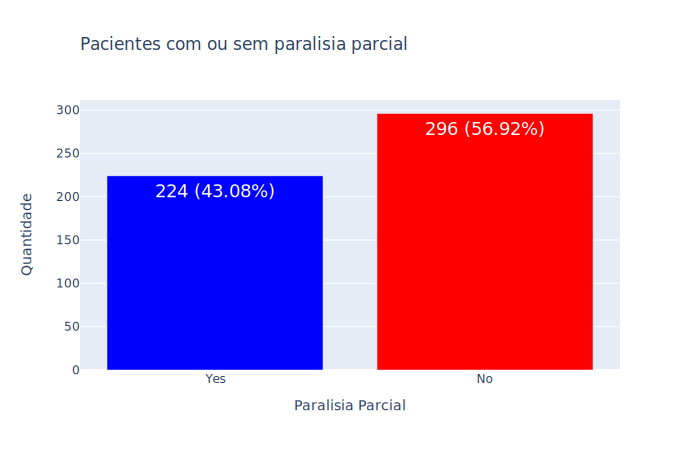

In [56]:
plotar_grafico_uma_categoria(
    diabetes['partial paresis'],
    'Pacientes com ou sem paralisia parcial',
    'Paralisia Parcial',
    'Quantidade'
)

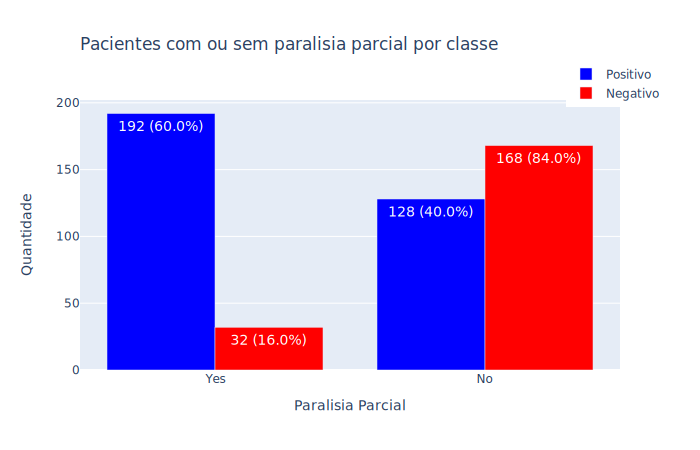

In [57]:
plotar_grafico_duas_categorias(
    'partial paresis',
    'Pacientes com ou sem paralisia parcial por classe',
    'Paralisia Parcial',
    'Quantidade'
)

#### Distribuição da variável muscle stiffness

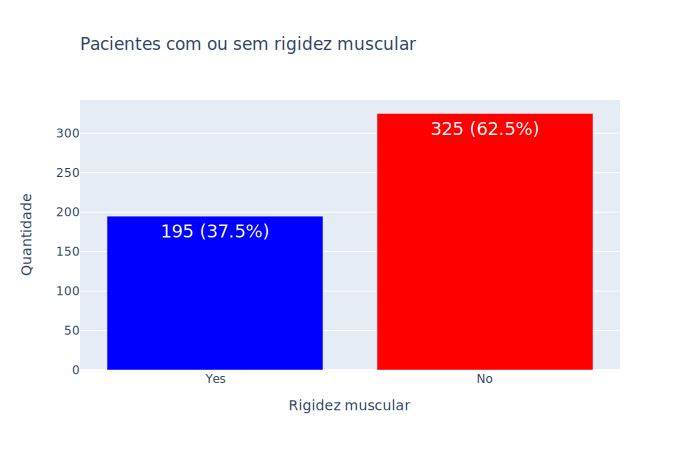

In [58]:
plotar_grafico_uma_categoria(
    diabetes['muscle stiffness'],
    'Pacientes com ou sem rigidez muscular',
    'Rigidez muscular',
    'Quantidade'
)

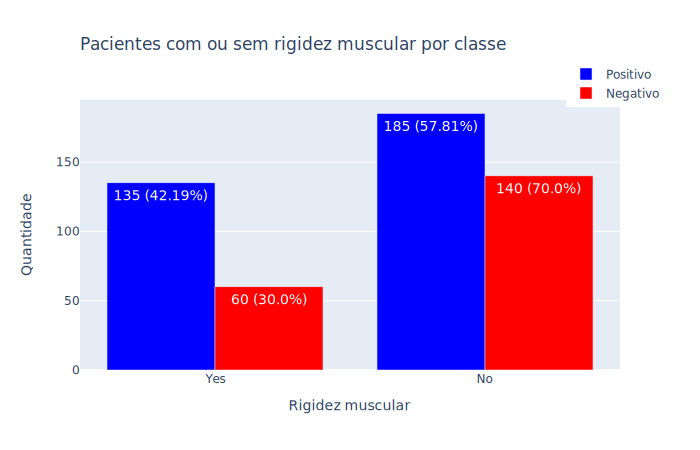

In [59]:
plotar_grafico_duas_categorias(
    'muscle stiffness',
    'Pacientes com ou sem rigidez muscular por classe',
    'Rigidez muscular',
    'Quantidade'
)

#### Distribuição da variável Alopecia

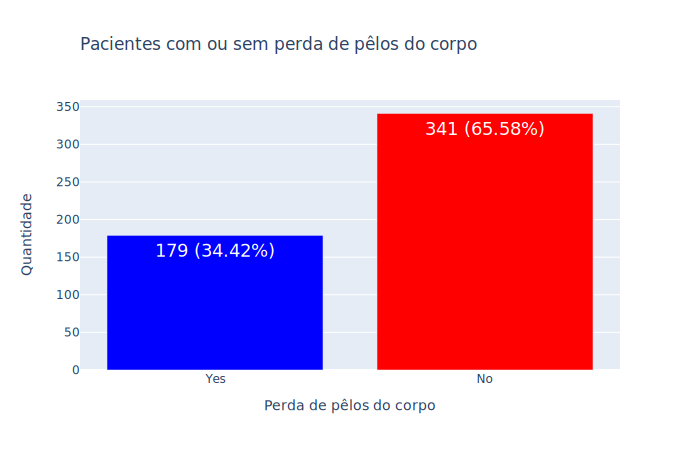

In [60]:
plotar_grafico_uma_categoria(
    diabetes['Alopecia'],
    'Pacientes com ou sem perda de pêlos do corpo',
    'Perda de pêlos do corpo',
    'Quantidade'
)

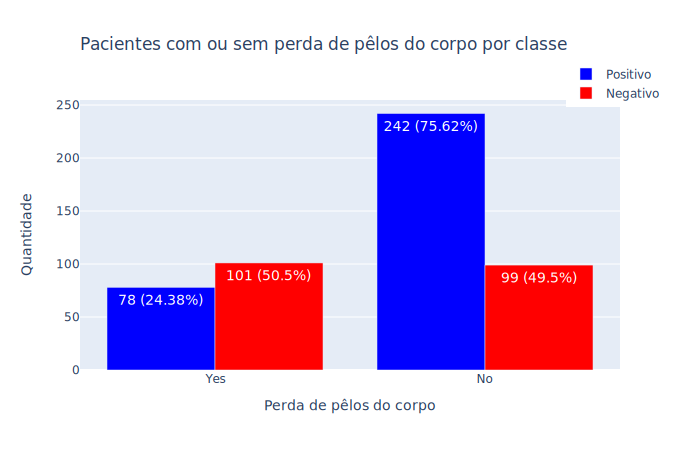

In [61]:
plotar_grafico_duas_categorias(
    'Alopecia',
    'Pacientes com ou sem perda de pêlos do corpo por classe',
    'Perda de pêlos do corpo',
    'Quantidade'
)

#### Distribuição da variável Obesity

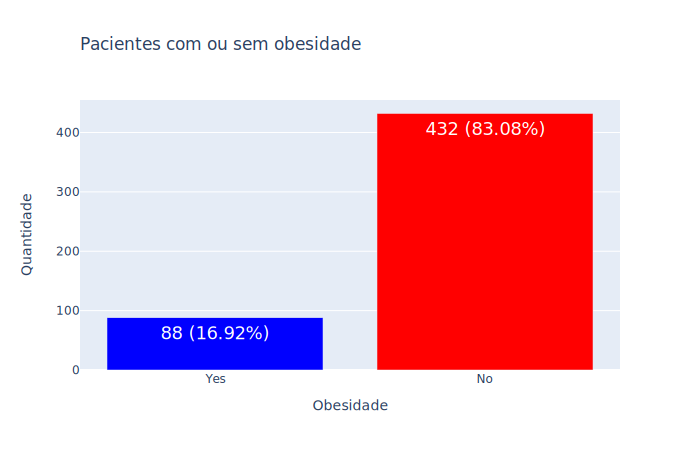

In [62]:
plotar_grafico_uma_categoria(
    diabetes['Obesity'],
    'Pacientes com ou sem obesidade',
    'Obesidade',
    'Quantidade'
)

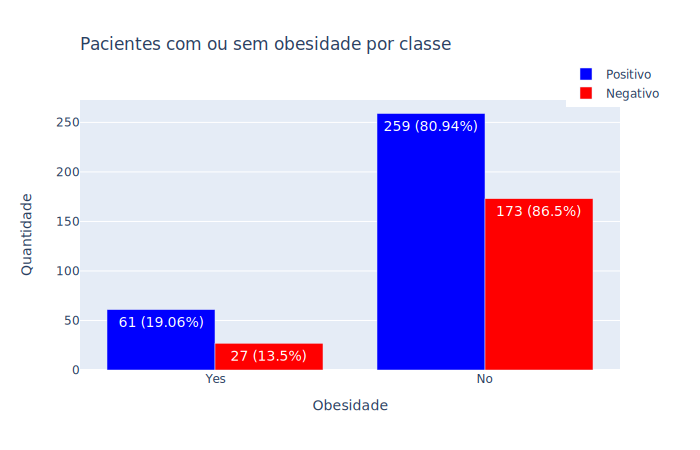

In [63]:
plotar_grafico_duas_categorias(
    'Obesity',
    'Pacientes com ou sem obesidade por classe',
    'Obesidade',
    'Quantidade'
)

### Analisando a correlação do conjunto de dados

Vamos criar uma cópia do conjunto de dados

In [64]:
diabetes_copy = diabetes.copy()

Vamos transformar a variável target de texto para número

In [65]:
diabetes_copy['class'] = diabetes_copy['class'].apply(lambda x: 0 if x == 'Negative' else 1)

Vamos inicializar o codificador

In [66]:
le = LabelEncoder()

Listando as colunas do tipo objeto

In [67]:
lista_colunas_objetos = diabetes_copy.select_dtypes(include = 'object').columns
lista_colunas_objetos

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

Agora vamos converter as colunas que possuem tipo objeto para numérico

In [68]:
for coluna in lista_colunas_objetos:
    diabetes_copy[coluna] = le.fit_transform(diabetes_copy[coluna].astype(str))

Calculando as correlações

In [69]:
correlacao_diabetes = diabetes_copy.corr()

Plotando o mapa de calor das correlações

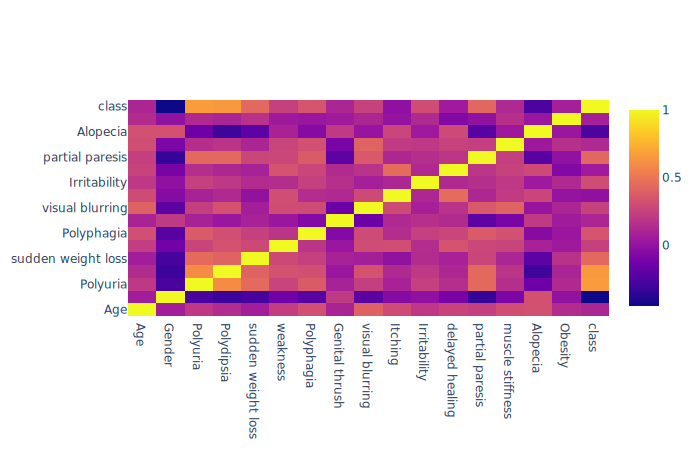

In [70]:
fig = go.Figure(
    data = go.Heatmap(
        x=correlacao_diabetes.columns,
        y=correlacao_diabetes.index,
        z=correlacao_diabetes))
fig.show('svg')

Analistando o gráfico, temos que as características Poliúria (Polyuria) e Polidipsia (Polydipsia) são as que possuem a maior correlação com a variável target class

## 2. Quais os 3 principais fatores que levam a um diagnóstico positivo de diabetes?

Primeiro vamos separar a variável target do resto do conjunto de dados

In [71]:
X = diabetes_copy.drop(['class'], axis = 1)

In [72]:
y = diabetes_copy['class']

Mostrando as informações do conjunto de dados depois da transformação

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
dtypes: int32(15), int64(1)
memory usage: 34.7 KB

Apresentando os cinco primeiros registros

In [74]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


Calculando as correlações entre as características e a variável target classe

In [75]:
correlacoes = X.corrwith(y)

Ordenando a lista de valores da correlação entre as características e a variável classe

In [76]:
correlacoes.sort_values(ascending=False)

Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233
dtype: float64

Exibindo o gráfico das correlações

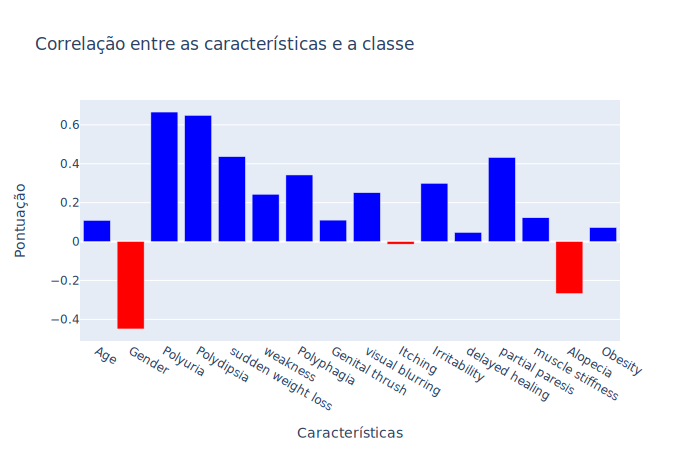

In [77]:
colors = ['blue' if valor > 0 else 'red' for valor in correlacoes.to_list()]

correlacao_fig = go.Figure(data=[go.Bar(
    x=correlacoes.index,
    y=correlacoes,
    marker_color=colors
)])
correlacao_fig.update_layout(
    title_text='Correlação entre as características e a classe',
    xaxis_title_text='Características',
    yaxis_title_text='Pontuação',
)
correlacao_fig.show('svg')

Analisando as correlações entre as características e o diagnóstico de Diabetes, temos que os três principais fatores correlacionados com o diagnóstico de diabetes são a Poliúria (Polyuria) com 66,59% de correlação, a Polidipsia (Polydipsia) com 64,87% de correlação e a perda de peso repentina (sudden weight loss) com 43,65%.

In [78]:
best_feature = SelectKBest(score_func=chi2,k=10)

In [79]:
fit = best_feature.fit(X, y)

In [80]:
features_scores = pd.Series(fit.scores_, index=X.columns)

In [81]:
features_scores.sort_values(ascending = False)

Polydipsia            120.785515
Polyuria              116.184593
sudden weight loss     57.749309
partial paresis        55.314286
Gender                 38.747637
Irritability           35.334127
Polyphagia             33.198418
Alopecia               24.402793
Age                    18.845767
visual blurring        18.124571
weakness               12.724262
Genital thrush          4.914009
muscle stiffness        4.875000
Obesity                 2.250284
delayed healing         0.620188
Itching                 0.047826
dtype: float64

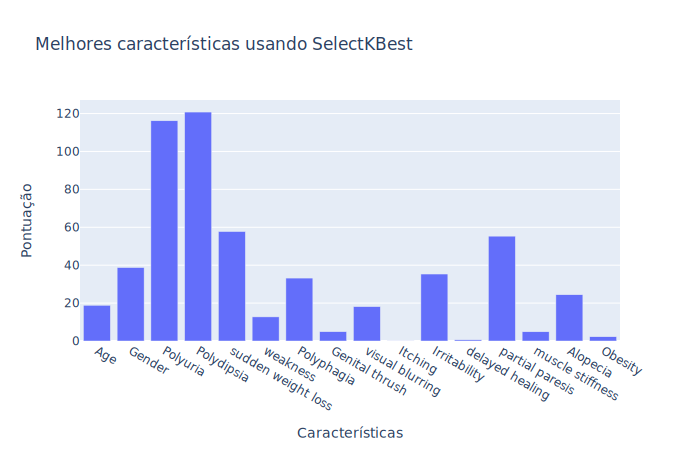

In [82]:
melhores_features_fig = go.Figure(data=[go.Bar(
    x=features_scores.index,
    y=features_scores,
)])
melhores_features_fig.update_layout(
    title_text='Melhores características usando SelectKBest',
    xaxis_title_text='Características',
    yaxis_title_text='Pontuação',
)
melhores_features_fig.show('svg')

Analisando as pontuações do SelectKBest, temos que as características mais importantes continuam sendo Poliúria (Polyuria), Polidipsia (Polydipsia) e a perda de peso repentina (sudden weight loss), contudo mudando a ordem entre as duas primeiras.

## 3. Qual a chance de uma pessoa do sexo masculino com menos de 40 anos ter o diagnóstico positivo de diabetes?

In [83]:
male_below_40 = diabetes.loc[(diabetes['Gender'] == 'Male') & (diabetes['Age'] < 40), 'class']

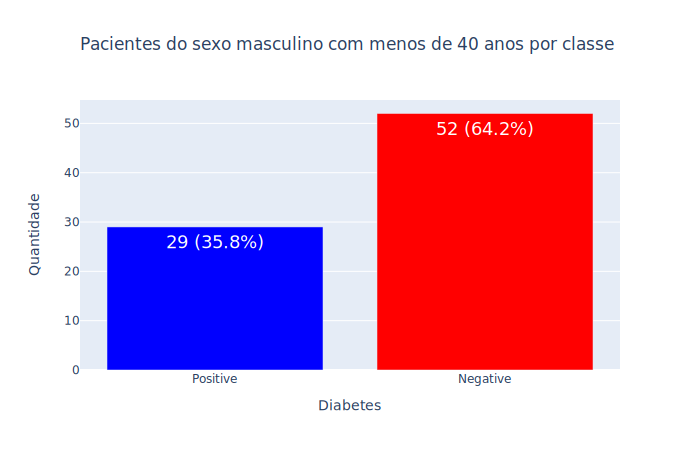

In [84]:
plotar_grafico_uma_categoria(
    male_below_40,
    'Pacientes do sexo masculino com menos de 40 anos por classe',
    'Diabetes',
    'Quantidade'
)

Analisando os dados dos pacientes do sexo masculino com menos de 40 anos, temos que a chance deles serem diagnosticados com Diabetes é de 35,8%.

## 4. Qual a relação entre Polyphagia e o diagnóstico de diabetes?

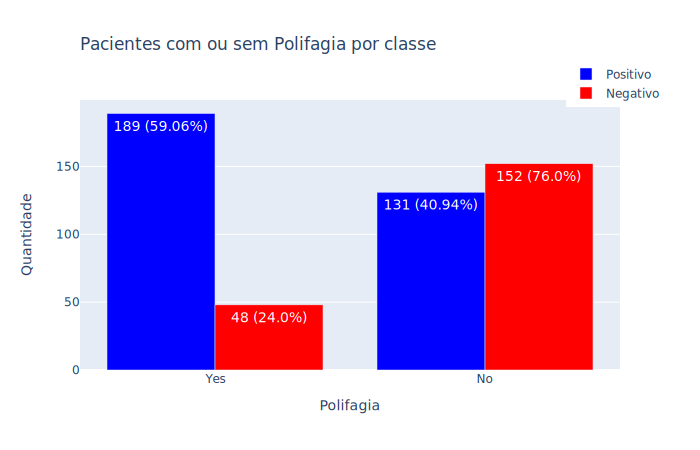

In [85]:
plotar_grafico_duas_categorias(
    'Polyphagia',
    'Pacientes com ou sem Polifagia por classe',
    'Polifagia',
    'Quantidade'
)

De acordo com o conjunto de dados, 59,06% dos pacientes com diagnóstico de Polifagia (Polyphagia) também foram diagnosticados com Diabetes.

## 5. Crie um modelo preditivo para a previsão de diabetes que desconsidere as 5 variáveis menos importantes para o diagnóstico.

Vamos dividir o conjunto de dados para treino e teste

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 12345)

In [87]:
y_train.value_counts()

1    256
0    160
Name: class, dtype: int64

In [88]:
y_test.value_counts()

1    64
0    40
Name: class, dtype: int64

Vamos normalizar a variável Age 

In [89]:
minmax = MinMaxScaler()

In [90]:
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

C:\Users\profj\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\profj\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
515,0.310811,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
169,0.513514,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0
122,0.324324,1,0,1,0,1,1,0,0,1,1,1,1,1,0,1
278,0.297297,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188,0.729730,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0


### Construção dos modelos preditivos

Para a construção do modelo preditivo, vamos utilizar a biblioteca scikit-learn. De acordo com o artigo [Choosing the right](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), como queremos criar um modelo de predição para realizar uma tarefa de classificação e os nossos dados já estão rotulados com quem possui diabetes ou não e o conjunto possui apenas 520 amostras, vamos verificar o classificador mais adequado entre o Linear SVC, o KNN e o SVC.

![](ml_map.png)

Inicializando a função KFold para fazer a validação cruzada 

In [92]:
kfold = KFold(n_splits = 10, random_state = 7, shuffle=True)

Inicializando os modelos

In [93]:
linear_svc = LinearSVC(random_state=0, tol=1e-5)

In [94]:
knn = KNeighborsClassifier(n_neighbors=2)

In [95]:
svc = SVC(gamma='auto')

In [96]:
rf = RandomForestClassifier()

Treinando os modelos

In [97]:
linear_svc.fit(X_train, y_train)

LinearSVC(random_state=0, tol=1e-05)

In [98]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [99]:
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [100]:
rf.fit(X_train,y_train)

RandomForestClassifier()

Fazendo a validação cruzada

In [101]:
linear_svc_acc = cross_val_score(
    estimator = linear_svc,
    X = X_train,
    y = y_train,
    cv = kfold,
    scoring = 'accuracy'
)

In [102]:
knn_acc = cross_val_score(
    estimator = knn,
    X = X_train,
    y = y_train,
    cv = kfold,
    scoring = 'accuracy'
)

In [103]:
svc_acc = cross_val_score(
    estimator = svc,
    X = X_train,
    y = y_train,
    cv = kfold,
    scoring = 'accuracy'
)

In [104]:
rf_acc = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold, scoring='accuracy')

Calculando as médias dos scores de acurácia

In [105]:
linear_svc_acc.mean()

0.9086527293844368

In [106]:
knn_acc.mean()

0.9349593495934959

In [107]:
svc_acc.mean()

0.9180603948896632

In [108]:
rf_acc.mean()

0.966260162601626

Realizando a previsão dos valores da saída dos modelos

In [109]:
linear_svc_y_predict = linear_svc.predict(X_test)

In [110]:
knn_y_predict = knn.predict(X_test)

In [111]:
svc_y_predict = svc.predict(X_test)

In [112]:
rf_y_predict = rf.predict(X_test)

Calculando as métricas dos modelos

In [113]:
linear_svc_acc_score = accuracy_score(y_test, linear_svc_y_predict)
linear_svc_prec = precision_score(y_test, linear_svc_y_predict)
linear_svc_rec = recall_score(y_test, linear_svc_y_predict)
linear_svc_f1 = f1_score(y_test, linear_svc_y_predict)
linear_svc_roc = roc_auc_score(y_test, linear_svc_y_predict)
linear_svc_cm = confusion_matrix(y_test, linear_svc_y_predict)

In [114]:
knn_acc_score = accuracy_score(y_test, knn_y_predict)
knn_prec = precision_score(y_test, knn_y_predict)
knn_rec = recall_score(y_test, knn_y_predict)
knn_f1 = f1_score(y_test, knn_y_predict)
knn_roc = roc_auc_score(y_test, knn_y_predict)
knn_cm = confusion_matrix(y_test, knn_y_predict)

In [115]:
svc_acc_score = accuracy_score(y_test, svc_y_predict)
svc_prec = precision_score(y_test, svc_y_predict)
svc_rec = recall_score(y_test, svc_y_predict)
svc_f1 = f1_score(y_test, svc_y_predict)
svc_roc = roc_auc_score(y_test, svc_y_predict)
svc_cm = confusion_matrix(y_test, svc_y_predict)

In [116]:
rf_roc = roc_auc_score(y_test, rf_y_predict)
rf_acc_score = accuracy_score(y_test, rf_y_predict)
rf_prec = precision_score(y_test, rf_y_predict)
rf_rec = recall_score(y_test, rf_y_predict)
rf_f1 = f1_score(y_test, rf_y_predict)
rf_cm = confusion_matrix(y_test, rf_y_predict)

Mostrando as matrizes de confusão

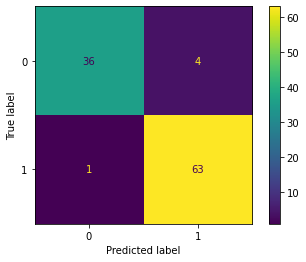

In [117]:
linear_svc_cm_display = ConfusionMatrixDisplay(linear_svc_cm).plot()

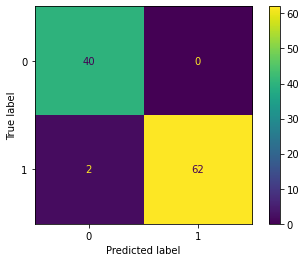

In [118]:
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot()

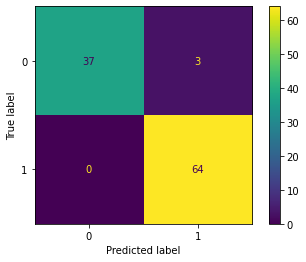

In [119]:
svc_cm_display = ConfusionMatrixDisplay(svc_cm).plot()

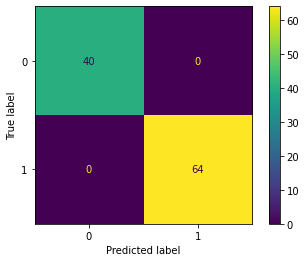

In [120]:
rf_cm_display = ConfusionMatrixDisplay(rf_cm).plot()

Preparando a lista com os dicionários com os modelos para plotar as curvas ROC

In [121]:
lista_modelos = [
    {
        'nome': 'Linear SVC',
        'predict': linear_svc_y_predict,
        'auc_score': linear_svc_roc
    },
    {
        'nome': 'KNN',
        'predict': knn_y_predict,
        'auc_score': knn_roc
    },
    {
        'nome': 'SVC',
        'predict': svc_y_predict,
        'auc_score': svc_roc
    },
    {
        'nome': 'Random Forest',
        'predict': rf_y_predict,
        'auc_score': rf_roc
    }
]

Plotando a curva ROC dos modelos

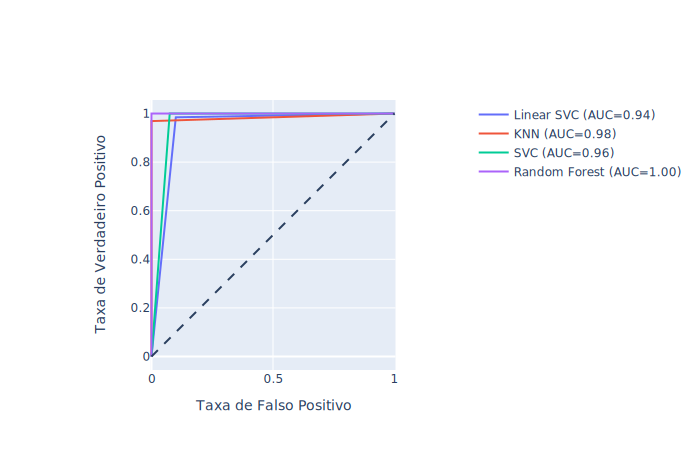

In [122]:
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for modelo in lista_modelos:
    fpr, tpr, _ = roc_curve(y_test, modelo['predict'])
    
    name = f"{modelo['nome']} (AUC={modelo['auc_score']:.2f})"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='Taxa de Falso Positivo',
    yaxis_title='Taxa de Verdadeiro Positivo',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=700
)
fig.show('svg')

Criando uma lista pra armazenar os resultados das métricas

In [123]:
lista_resultados = []

Adicionando as métricas na lista

In [124]:
lista_resultados.append([
    'Linear SVC',
    linear_svc_acc_score,
    linear_svc_acc.mean(),
    linear_svc_prec,
    linear_svc_rec,
    linear_svc_f1,
    linear_svc_roc
])

In [125]:
lista_resultados.append([
    'KNN',
    knn_acc_score,
    knn_acc.mean(),
    knn_prec,
    knn_rec,
    knn_f1,
    knn_roc
])

In [126]:
lista_resultados.append( [
    'SVC',
    svc_acc_score,
    svc_acc.mean(),
    svc_prec,
    svc_rec,
    svc_f1,
    svc_roc
])

In [127]:
lista_resultados.append( [
    'Random Forest',
    rf_acc_score,
    rf_acc.mean(),
    rf_prec,
    rf_rec,
    rf_f1,
    rf_roc
])

Criando uma tabela para armazenar os resultados das avaliações dos modelos preditivos

In [128]:
resultados = pd.DataFrame(
    lista_resultados,
    columns = [
        'Modelo',
        'Acurácia',
        'Acurácia Val. Cruzada',
        'Precisão',
        'Recall',
        'F1 Score',
        'ROC'
    ]
)

Apresentando os resultados

In [129]:
resultados

,Modelo,Acurácia,Acurácia Val. Cruzada,Precisão,Recall,F1 Score,ROC
0,Linear SVC,0.951923,0.908653,0.940299,0.984375,0.961832,0.942187
1,KNN,0.980769,0.934959,1.000000,0.968750,0.984127,0.984375
2,SVC,0.971154,0.918060,0.955224,1.000000,0.977099,0.962500
3,Random Forest,1.000000,0.966260,1.000000,1.000000,1.000000,1.000000


Como estamos tentando identificar pacientes que possuem diabetes, o ideal é que o modelo tenha um valor alto para o Recall, ou seja, que consigamos identificar uma maior quantidade de pacientes realmente doentes (Verdadeiro Positivo - True Positive) mesmo que isso faça com que o modelo considere alguns pacientes saudáveis como sendo doentes (Falso Positivo - False Positive). Desta forma, o modelo Random Forest será o escolhido tendo em vista que ele teve o melhor desempenho entre os quatro e a maior taxa de Recall, juntamente com o SVC.

Mostrando a lista das importâncias das características

In [130]:
rf.feature_importances_

array([0.10527938, 0.10547676, 0.21715161, 0.17835891, 0.06167671,
       0.02809848, 0.0290776 , 0.01970893, 0.02810248, 0.02986923,
       0.04685357, 0.02695781, 0.04796649, 0.02738357, 0.03098754,
       0.01705093])

Criando uma coluna para relacionar as importâncias com seus respectivos nomes de colunas

In [131]:
features_importances = pd.Series(rf.feature_importances_, index = X.columns)

Criando uma lista que desconsidera as cinco características menos importantes

In [132]:
important_features = features_importances.sort_values(ascending=False).index.to_list()[:-5]

Criando um novo conjunto de dados com as características mais importantes

In [133]:
X_important = X[important_features]

Mostrando as informações do novo conjunto de dados com apenas 11 colunas ao invés das 16 originais

In [134]:
X_important.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Polyuria            520 non-null    int32
 1   Polydipsia          520 non-null    int32
 2   Gender              520 non-null    int32
 3   Age                 520 non-null    int64
 4   sudden weight loss  520 non-null    int32
 5   partial paresis     520 non-null    int32
 6   Irritability        520 non-null    int32
 7   Alopecia            520 non-null    int32
 8   Itching             520 non-null    int32
 9   Polyphagia          520 non-null    int32
 10  visual blurring     520 non-null    int32
dtypes: int32(10), int64(1)
memory usage: 24.5 KB


Separando o conjunto de dados entre treino e teste

In [135]:
X_important_train, X_important_test, y_important_train,  y_important_test = train_test_split(
    X_important,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 12345
)

Normalizando a variável de idade

In [136]:
X_important_train[['Age']] = minmax.fit_transform(X_important_train[['Age']])
X_important_test[['Age']] = minmax.transform(X_important_test[['Age']])

C:\Users\profj\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\profj\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Inicializando o novo modelo

In [137]:
rf_important = RandomForestClassifier()

Treinando o novo modelo

In [138]:
rf_important.fit(X_important_train,y_important_train)

RandomForestClassifier()

Fazendo a validação cruzada

In [139]:
rf_important_acc = cross_val_score(estimator = rf_important, X = X_important_train, y = y_important_train, cv = kfold, scoring='accuracy')

Calculando a média

In [140]:
rf_important_acc.mean()

0.9662020905923345

Calculando as métricas

In [141]:
rf_important_y_predict = rf.predict(X_test)
rf_important_roc = roc_auc_score(y_test, rf_important_y_predict)
rf_important_acc_score = accuracy_score(y_test, rf_important_y_predict)
rf_important_prec = precision_score(y_test, rf_important_y_predict)
rf_important_rec = recall_score(y_test, rf_important_y_predict)
rf_important_f1 = f1_score(y_test, rf_important_y_predict)

In [142]:
resultados = resultados.append(
    pd.DataFrame(
        [[
            'Random Forest Selec.',
            rf_important_acc_score,
            rf_important_acc.mean(),
            rf_important_prec,
            rf_important_rec,
            rf_important_f1,
            rf_important_roc
        ]],
        columns = [
            'Modelo',
            'Acurácia',
            'Acurácia Val. Cruzada',
            'Precisão',
            'Recall',
            'F1 Score',
            'ROC'
        ]
    ),
    ignore_index = True
)

In [143]:
resultados

,Modelo,Acurácia,Acurácia Val. Cruzada,Precisão,Recall,F1 Score,ROC
0,Linear SVC,0.951923,0.908653,0.940299,0.984375,0.961832,0.942187
1,KNN,0.980769,0.934959,1.000000,0.968750,0.984127,0.984375
2,SVC,0.971154,0.918060,0.955224,1.000000,0.977099,0.962500
3,Random Forest,1.000000,0.966260,1.000000,1.000000,1.000000,1.000000
4,Random Forest Selec.,1.000000,0.966202,1.000000,1.000000,1.000000,1.000000


Como podemos observar nos resultados, o modelo perdeu um pouco de desempenho quando desconsideramos as características menos importantes.

## 6. Fale sobre as dificuldades que o modelo construído poderia ter para alcançar o sucesso esperado pelo treino em um novo dataset.

A primeira dificuldade é que a utilização de um grande número de árvores pode fazer com que o algoritmo fique lento e não seja eficaz em realizar previsões em tempo real. O algoritmo é rápido para ser treinado, mas lento para realizar previsões a partir do modelo treinado.

A segunda dificuldade a ser considerada seria com relação ao tamanho do novo conjunto de dados tendo em vista que o modelo de Random Forest não tem uma performance boa com conjuntos de dados muito grandes.

A terceira dificuldade é que uma floresta treinada pode requerer uma grande quantidade de memória para ser armazenada por conta da retenção da informação de uma centena de árvores individuais.